In [1]:
import pandas as pd

labeled_data = pd.read_csv('/content/data_manual.csv')
labeled_data.head()

,app_name,rating,review,preprocessed_text,Label
0,Duolingo,5,duolingo mengajariku bahasa Jepang sekarang ak...,ajar bahasa jepang paham bahasa jepang,Positif
1,Duolingo,5,"bagus,bisa untuk belajarr",bagus ajar,Positif
2,Duolingo,5,"sangat melatih, aplikasinya juga bagus",latih aplikasi bagus,Positif
3,Duolingo,5,sangat seru terasa bermain tapi menambah ilmu ...,seru main tambah ilmu suka banget,Positif
4,Duolingo,5,cara mudah belajar bahasa sangat mantap,mudah ajar bahasa mantap,Positif


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Definisikan fitur (X) dan target (y)
X = labeled_data['preprocessed_text']
y = labeled_data['Label']

# Encode label 'positif'/'negatif' menjadi 1/0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian (misal: 80% latih, 20% uji)
# `stratify=y_encoded` penting untuk menjaga proporsi label di setiap set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Ukuran data pelatihan: {len(X_train)} baris")
print(f"Ukuran data pengujian: {len(X_test)} baris")
print(f"Label yang di-encode: {label_encoder.classes_} menjadi {label_encoder.transform(label_encoder.classes_)}")

Ukuran data pelatihan: 240 baris
Ukuran data pengujian: 60 baris
Label yang di-encode: ['Negatif' 'Positif'] menjadi [0 1]


**TF-IDF**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur untuk performa lebih baik

# Latih vectorizer pada data pelatihan dan transformasikan data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformasikan data pengujian menggunakan vectorizer yang sudah dilatih
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Dimensi data pelatihan setelah TF-IDF: {X_train_tfidf.shape}")
print(f"Dimensi data pengujian setelah TF-IDF: {X_test_tfidf.shape}")

Dimensi data pelatihan setelah TF-IDF: (240, 683)
Dimensi data pengujian setelah TF-IDF: (60, 683)


# **TF-IDF Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' cocok untuk dataset kecil

# Latih model
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Akurasi Model pada Data Uji: 0.9000

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.90      0.90        30
     Positif       0.90      0.90      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



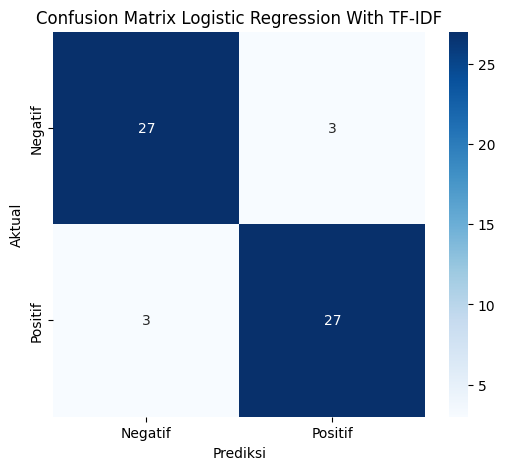

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test_tfidf)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Uji: {accuracy:.4f}")

# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
# Pastikan label_encoder.classes_ digunakan untuk laporan agar lebih mudah dibaca
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Logistic Regression With TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## **Naive Bayes Model with TF-IDF**


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train the model using TF-IDF features from the training data
naive_bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Akurasi Model Naive Bayes: 0.8667
Presisi Model Naive Bayes: 0.8056
Recall Model Naive Bayes: 0.9667
F1-score Model Naive Bayes: 0.8788

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

     Negatif       0.96      0.77      0.85        30
     Positif       0.81      0.97      0.88        30

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



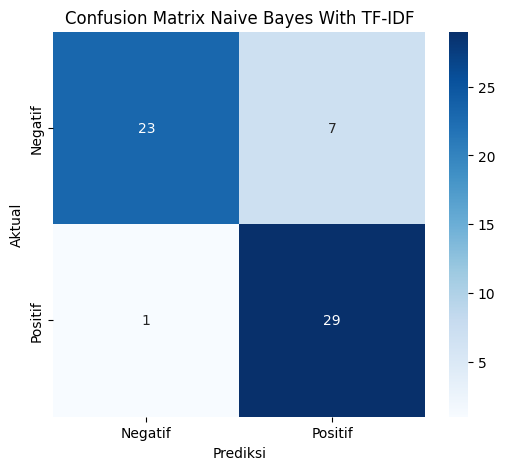

In [26]:
# Make predictions on the TF-IDF features from the test data
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Akurasi Model Naive Bayes: {accuracy_nb:.4f}")
print(f"Presisi Model Naive Bayes: {precision_nb:.4f}")
print(f"Recall Model Naive Bayes: {recall_nb:.4f}")
print(f"F1-score Model Naive Bayes: {f1_nb:.4f}")

# Classification Report
print("\nLaporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Naive Bayes With TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# **TF-IDF SVM**

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Support Vector Machine (SVM) model
# Using a linear kernel for text classification as it generally performs well with TF-IDF features
# and setting a random_state for reproducibility.
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Train the SVM model using TF-IDF features from the training data
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True, random_state=42)

Akurasi Model SVM: 0.9500
Presisi Model SVM: 0.9355
Recall Model SVM: 0.9667
F1-score Model SVM: 0.9508

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

     Negatif       0.97      0.93      0.95        30
     Positif       0.94      0.97      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



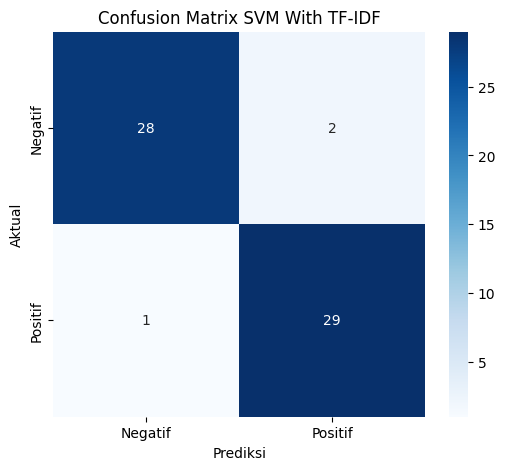

In [27]:
y_pred_svm = svm_model.predict(X_test_tfidf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Akurasi Model SVM: {accuracy_svm:.4f}")
print(f"Presisi Model SVM: {precision_svm:.4f}")
print(f"Recall Model SVM: {recall_svm:.4f}")
print(f"F1-score Model SVM: {f1_svm:.4f}")

print("\nLaporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix SVM With TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## **SVM Model With GloVe**

In [28]:
import os

# Check if the file already exists to avoid re-downloading
if not os.path.exists('glove.6B.100d.txt'):
    # Download the GloVe embeddings file. This is a common public link.
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip -q glove.6B.zip
    print("glove.6B.100d.txt downloaded and unzipped successfully.")
else:
    print("glove.6B.100d.txt already exists.")

--2025-12-10 07:58:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-12-10 07:58:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-12-10 07:58:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [29]:
glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe embeddings.")
# Display a sample embedding to verify
if 'the' in glove_embeddings:
    print(f"Vector for 'the': {glove_embeddings['the'][:5]}...") # Show first 5 dimensions
else:
    print("Word 'the' not found in embeddings (this is unexpected for GloVe).")

Loaded 400000 GloVe embeddings.
Vector for 'the': [-0.038194 -0.24487   0.72812  -0.39961   0.083172]...


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Initialize a Tokenizer object and fit it on X_train
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Get the word_index attribute
word_index = tokenizer.word_index

# Define the embedding_dim (100 for glove.6B.100d.txt)
embedding_dim = 100

# Create an empty NumPy array for the embedding matrix, filled with zeros
# +1 because word_index is 1-based
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

# Populate the embedding matrix
for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(f"Shape of embedding_matrix: {embedding_matrix.shape}")
print(f"Sample embedding for 'bagus' (if present):\n{embedding_matrix[word_index.get('bagus', 0)][:5]}...") # Show first 5 dimensions if 'bagus' is in vocabulary

Shape of embedding_matrix: (684, 100)
Sample embedding for 'bagus' (if present):
[-0.79166001 -0.183      -0.38361999  0.049404   -0.07585   ]...


In [31]:
def get_glove_embedding(text):
    # Convert text to sequence of word indices
    word_indices = tokenizer.texts_to_sequences([text])[0]

    word_embeddings = []
    for word_idx in word_indices:
        # Ensure word_idx is valid and within embedding_matrix bounds
        if word_idx > 0 and word_idx < len(embedding_matrix):
            word_embeddings.append(embedding_matrix[word_idx])

    if word_embeddings:
        # Calculate the mean of all word vectors in the document
        return np.mean(word_embeddings, axis=0)
    else:
        # Return a zero vector if no valid word embeddings are found
        return np.zeros(embedding_dim)

# Apply the function to X_train and X_test
X_train_glove = np.array([get_glove_embedding(text) for text in X_train])
X_test_glove = np.array([get_glove_embedding(text) for text in X_test])

print(f"Shape of X_train_glove: {X_train_glove.shape}")
print(f"Shape of X_test_glove: {X_test_glove.shape}")

Shape of X_train_glove: (240, 100)
Shape of X_test_glove: (60, 100)


In [35]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) model with GloVe embeddings
# Using a linear kernel as it generally performs well for text classification
# and setting a random_state for reproducibility.
svm_glove_model = SVC(kernel='linear', random_state=42, probability=True)

# Train the SVM model using the GloVe document embeddings from the training data
svm_glove_model.fit(X_train_glove, y_train)

SVC(kernel='linear', probability=True, random_state=42)

Akurasi Model SVM dengan GloVe: 0.7833
Presisi Model SVM dengan GloVe: 0.7742
Recall Model SVM dengan GloVe: 0.8000
F1-score Model SVM dengan GloVe: 0.7869

Laporan Klasifikasi SVM dengan GloVe:
              precision    recall  f1-score   support

     Negatif       0.79      0.77      0.78        30
     Positif       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



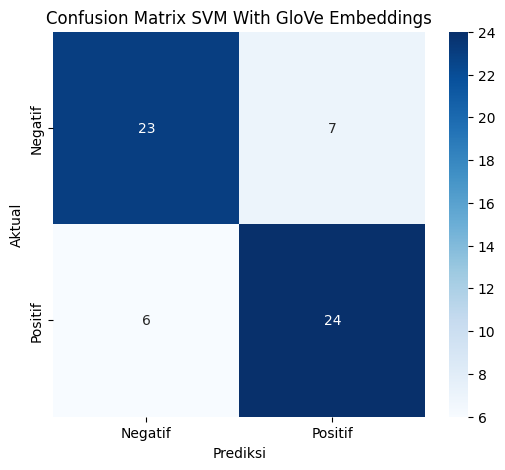

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data using the trained SVM GloVe model
y_pred_svm_glove = svm_glove_model.predict(X_test_glove)

# Calculate evaluation metrics
accuracy_svm_glove = accuracy_score(y_test, y_pred_svm_glove)
precision_svm_glove = precision_score(y_test, y_pred_svm_glove)
recall_svm_glove = recall_score(y_test, y_pred_svm_glove)
f1_svm_glove = f1_score(y_test, y_pred_svm_glove)

# Print the evaluation metrics
print(f"Akurasi Model SVM dengan GloVe: {accuracy_svm_glove:.4f}")
print(f"Presisi Model SVM dengan GloVe: {precision_svm_glove:.4f}")
print(f"Recall Model SVM dengan GloVe: {recall_svm_glove:.4f}")
print(f"F1-score Model SVM dengan GloVe: {f1_svm_glove:.4f}")

# Display classification report
print("\nLaporan Klasifikasi SVM dengan GloVe:")
print(classification_report(y_test, y_pred_svm_glove, target_names=label_encoder.classes_))

# Display Confusion Matrix
cm_svm_glove = confusion_matrix(y_test, y_pred_svm_glove)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_glove, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix SVM With GloVe Embeddings')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()